# Описание проекта

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки. 

Необходимо: приоритизировать гипотезы, запуститить A/B-тест и проанализировать результаты.

# Часть 1. Приоритизация гипотез.

# Задачи:

- Применить фреймворк ICE для приоритизации гипотез. 

- Отсортировать их по убыванию приоритета.

- Применить фреймворк RICE для приоритизации гипотез. 

- Отсортировать их по убыванию приоритета.

- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE, и объяснить, почему так произошло.

Загрузим библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from datetime import date, datetime, timedelta

Загрузим данные из csv-файлов

In [2]:
#Данные для первой части
hypothesis = pd.read_csv('/datasets/hypothesis.csv') 

In [3]:
#Данные для второй части(результаты A/B-теста,которые описаны в файлах)
orders = pd.read_csv('/datasets/orders.csv')

In [4]:
#(результаты A/B-теста,которые описаны в файлах)
visitors = pd.read_csv('/datasets/visitors.csv')

In [5]:
#Необходимо изучить данные и выполнить предобработку
#Выведем первые 10 строчек
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
#Теперь выведем общую информацию
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Необходимо привести к нижнему регистру названия колонок (видно, что некоторые названия колонок с большой, некоторые с маленькой);

In [7]:
#Необходимо привести названия колонок к нижнему регистру
hypothesis.columns = map(str.lower, hypothesis.columns)

In [8]:
#проверим, поменялись ли регистр в столбцах
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [9]:
#Проверим на дубликаты
print(hypothesis.duplicated().sum())

0


В таблице есть 8 гипотез и их параматеры.

Тип данных менять в таблице не следует, на дубликаты проверили(их нет), для однообразности оформления поменяли регистр в наименовании столбцов.

Теперь проанализурем остальные датафреймы:

In [10]:
#Выведем первые 10 строчек
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [11]:
#Видим, что необходимо поменять тип данных в колонке(в колонке со временем неподходящий тип данных, необходим поменять на datetime):
orders['date'] = pd.to_datetime(orders['date'])   

In [12]:
#Теперь выведем общую информацию
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [13]:
#Проверим на дубликаты
print(orders.duplicated().sum())

0


In [14]:
#Выведем первые 10 строчек
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [15]:
#Теперь выведем общую информацию
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
#Проверим на дубликаты
print(visitors.duplicated().sum())

0


In [17]:
#Видим, что необходимо поменять тип данных в колонке(в колонке со временем неподходящий тип данных, необходим поменять на datetime):
visitors['date'] = pd.to_datetime(visitors['date'])    

Мы ознакомились с датафреймами: вывели общую информацию и проверили на дубликаты, поменяли тип данных, где это было необходимо.

Перейдем к решению основных задач данной части:

ICE (влияние, уверенность, усилия) — один из самых популярных
способов приоритизации задач. ICE score = (Impact x Confidence) / Efforts

In [18]:
#Применим фреймворк ICE для приоритизации гипотез
hypothesis['ice'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
hypothesis['rice'] = (hypothesis['reach']  *hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Молодец что округляешь результаты!
</div>

In [19]:
#Отсортируем их по убыванию приоритета
pd.set_option('display.max_colwidth', 0)
hypothesis[['ice', 'hypothesis']].sort_values(by='ice', ascending=False)


,ice,hypothesis
8,16.20,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.33,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.20,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.00,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.00,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.00,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.33,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.12,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.00,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


RICE (влияние, уверенность, усилия, охват): RICE score = (Reach x Impact x Confidence) / Efforts . 

Фреймворк RICE состоит из четырёх компонент:

Reach — скольких пользователей затронет изменение, которое вы хотите
внести;

Impact — насколько сильно изменение повлияет на пользователей, их
опыт и удовлетворение от продукта;

Confidence — насколько вы уверены, что это изменение повлияет на
пользователей именно так;

Efforts — сколько стоит протестировать эту гипотезу.

Gараметры фреймворков ICE и RICE оценивают в удобных шкалах:
например, от 0 до 10.

In [20]:
#Применим фреймворк RICE для приоритизации гипотез
#Отсортируем их по убыванию приоритета
pd.set_option('display.max_colwidth', 0)
hypothesis[['rice', 'hypothesis', 'reach']].sort_values(by='rice', ascending=False)

,rice,hypothesis,reach
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения",1
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


Теперь необходимо указать, как изменилась приоритизация гипотез при применении RICE вместо ICE, и объяснить, почему так произошло.

Видим, что в таблицах ICE и RICE разные лидеры. Так произошло, потому что при расчете RICE мы учитываем один из компонентов данной модификации(подробнее описаны выше), а конкретно - параметр Reach, который показывает, скольких пользователей затронет изменение, которое мы хотим внести.

Для тестирования будем выбирать гипотезы из таблицы с расчетом RICE: 
- гипотеза № 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

- гипотеза № 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 

В случае, если придется выбрать еще одну гипотезу - дополнительно выберем:

- гипотезу № 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


# Часть 2. Анализ A/B-теста

# Задачи:

Проанализировать A/B-тест:

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения

- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

- Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

- Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

- Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

- Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения. 

- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

- Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Кумулятивная выручка по группам

Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [21]:
#Рассчитаем cреднюю выручку в день для каждой группы (взяли медиану, 
#чтобы на величине средней выручки не отражались "выбросы"(сверхвысокие и сверхнизкие значения))
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

In [22]:
#Теперь объединим данные по обеим таблциам в таблицу cumulativeData
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [23]:
#Вывыедем первые 20 строк
cumulativeData.head(20)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


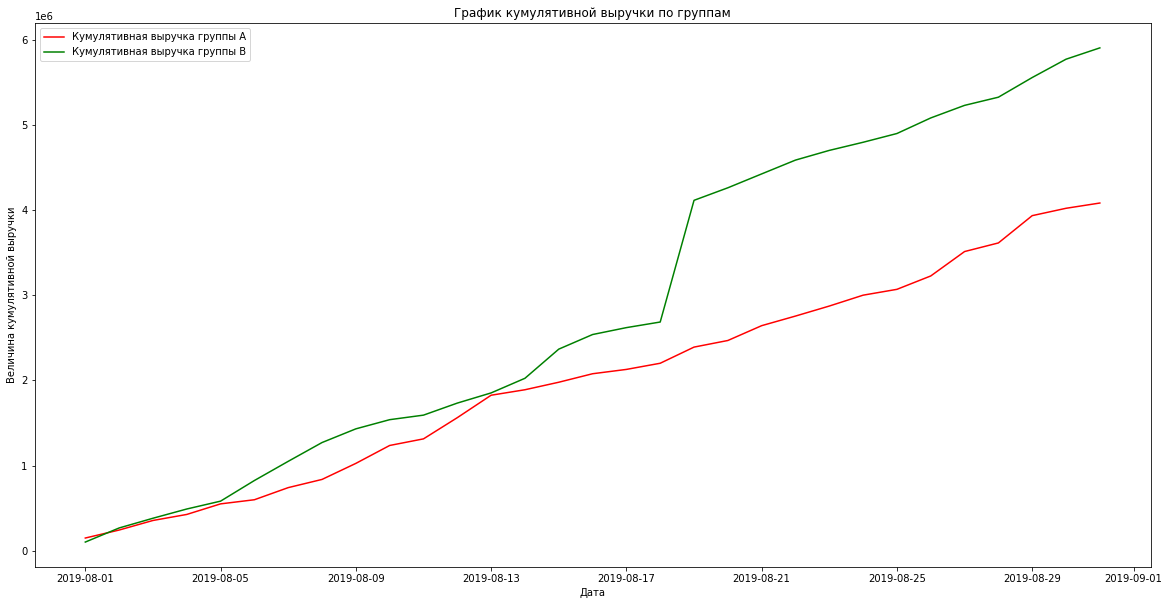

In [24]:
#Теперь построим графики кумулятивной выручки по группам
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(20,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'],color = 'Red', label='Кумулятивная выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'],color = 'Green', label='Кумулятивная выручка группы B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Величина кумулятивной выручки')
plt.legend();

Из графика видно, что кумулятивная выручка группы В выше, чем кумулятивная выручки группы А. С начала рассматриваемого периода кумулятивная выручка росла для двух групп более-менее равномерно, но после 5 августа видно расхождение. 13 августа наблюдаеттся повышение кумулятивной выручки для группы А до уровня кумулятивной выручки группы В, но после этой даты наблюдатеся повышение кумулятивной выручки для группы В настолько, что снова видна очевидная разница между выручками для обеих групп.


Необходимо проанализировать резкий рост выручки в группе В. Можно обратить внимание, что в промежутке с 17 августа и до конца рассматриваемого периода наблюдается резкое повышение кумулятивной выручки в группе В. Это может быть связано с появлением крупных заказов или с увеличением числа заказов в данной группе, что является результатом тестирования гипотезы и появления новой особенности на сайте/в услугах/в доставке и т.д.


# Кумулятивный средний чек по группам

Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

Для графика среднего кумулятивного чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

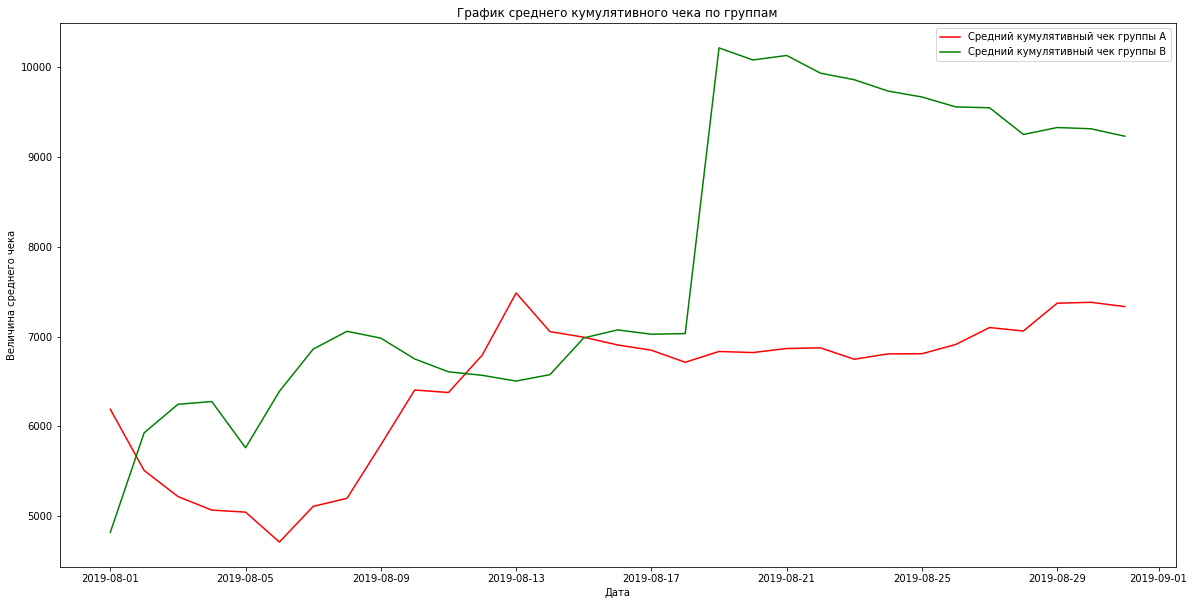

In [25]:
plt.figure(figsize=(20,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Средний кумулятивный чек группы A',color = 'Red')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Средний кумулятивный чек группы B',color = 'Green')
plt.title('График среднего кумулятивного чека по группам')
plt.xlabel('Дата')
plt.ylabel('Величина среднего чека')
plt.legend();

Видим, что в начале рассматриваемого периода величина среднего кумулятивного чека группы А снизился, но к 13 августу повысился и был выше величины среднего кумулятивного чека группы В, но в дальнейшем снова снизился. Величина среднего кумулятивного чека группы В выше группы А на протяжении почти всего рассматриваемого периода. Стоит отметить, что ближе к середине августа наблюдется максимальное значение величины среднего кумулятивного чека группы В, но потом идет на снижении до конца рассматриваемого периода.

# Изменение кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

In [26]:
#Необходимо собрать данные в одном датафрейме mergedCumulativeRevenue
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

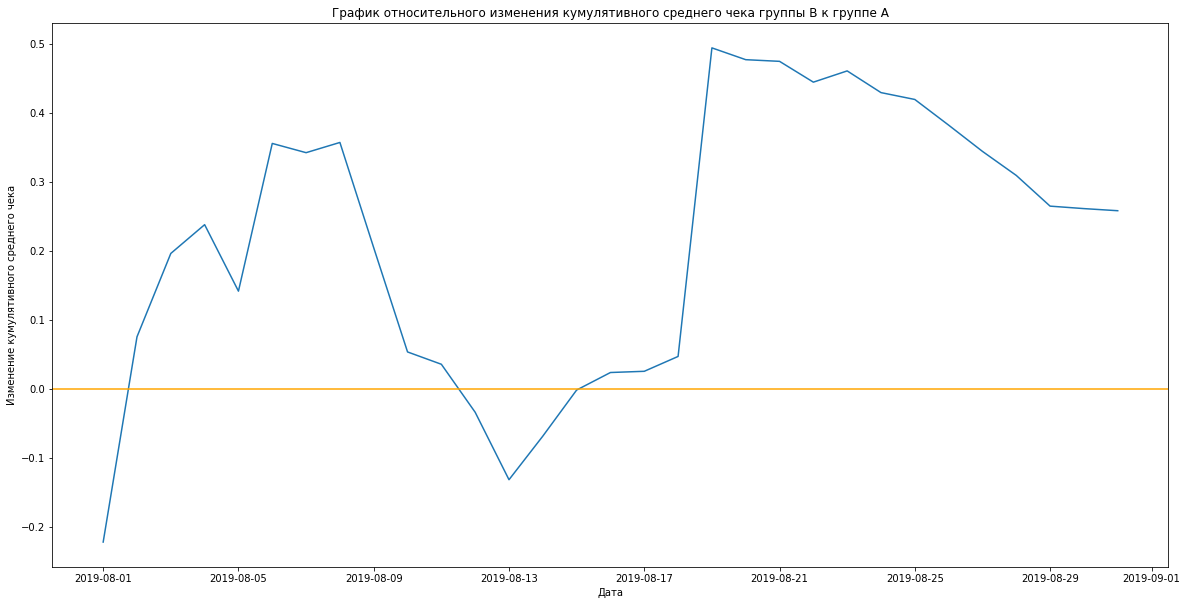

In [27]:
#Построим график
plt.figure(figsize=(20,10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего чека')
plt.axhline(y=0, color='orange', linestyle='-') ;

На графике можно отметить максимальные и мнимальные точки изменения величины кумулятивного среднего чека группы В к группе А. Видно, что величина среднего чека группы В больше группы А почти на протяжении всего рассматриваемого периода, лишь только к 13 августа снижатеся и становится меньше, чем кумулятивный средний чек группы А.

# Кумулятивное среднее количество заказов по группам

Построим график кумулятивного среднего количества заказов по группам(конверсии). Сделайте выводы и предположения.

Text(0, 0.5, 'Среднее количество заказов по группам')

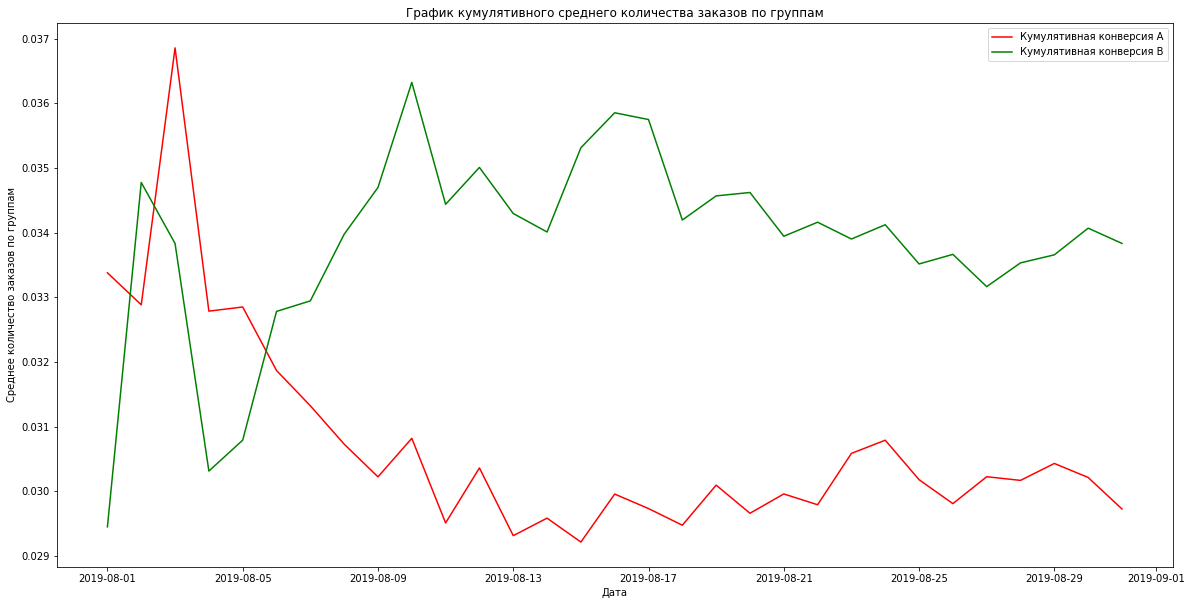

In [28]:
cumulativeData['cum_orders_in_groups'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(20,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['cum_orders_in_groups'], label='Кумулятивная конверсия A',color = 'Red')
plt.plot(cumulativeDataB['date'], cumulativeDataB['cum_orders_in_groups'], label='Кумулятивная конверсия B',color = 'Green')
plt.legend();
plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов по группам')

Видим, что среднее количество заказов в начале рассматриваемого периода было выше для группы А, но потом стало снижаться до конца рассматриваемого периода, а для групы В среднее количество заказов возрастало до конца рассматриваемого периода. Максимальное значение среднего количества заказов для группа В наблюдается в промежутку между 9 августа и 13 августа, минимальное ближе к 5 августа. Для группы А наблюдается максимальная величина среднего количества заказов в промежутку между 1 авгутса и 5 августа, а минимальное между 13 августа и 17 августа.

# Относительное изменение кумулятивного среднего количества заказов группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения.

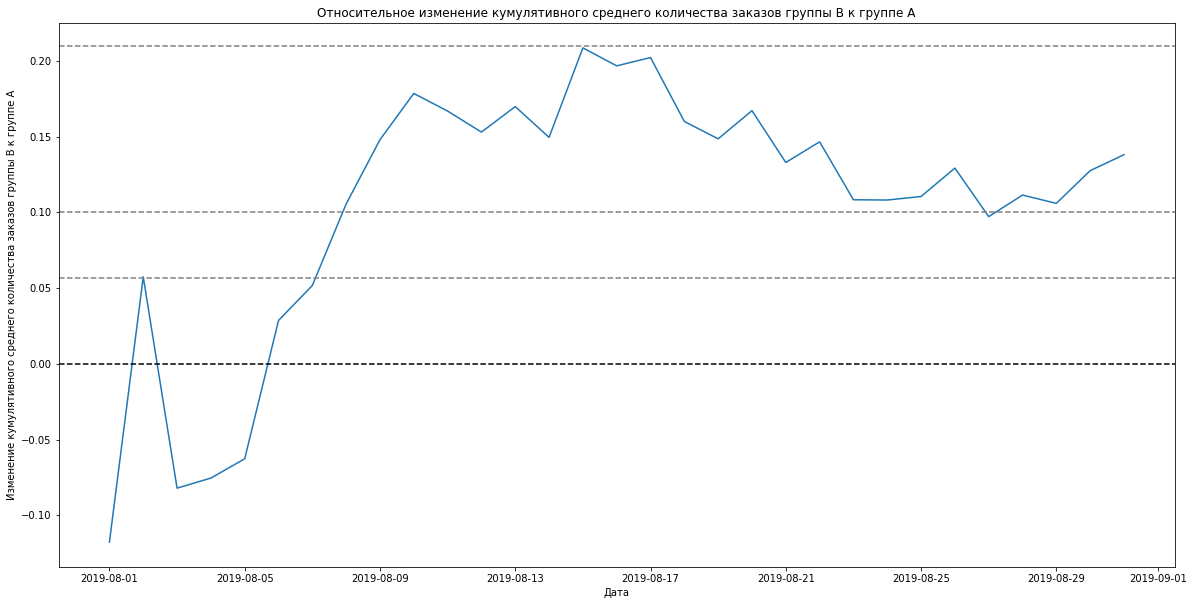

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','cum_orders_in_groups']].merge(cumulativeDataB[['date','cum_orders_in_groups']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20,10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['cum_orders_in_groupsB']/mergedCumulativeConversions['cum_orders_in_groupsA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего количества заказов группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axhline(y=0.057, color='grey', linestyle='--');

На графике можно отметить максимальные и минимальные точки изменения величины кумулятивного среднего количества заказов  группы В к группе А. Видно, что величина среднего количества заказов группы В больше группы А почти на протяжении всего рассматриваемого периода.

# Количество заказов по пользователям

Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [30]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


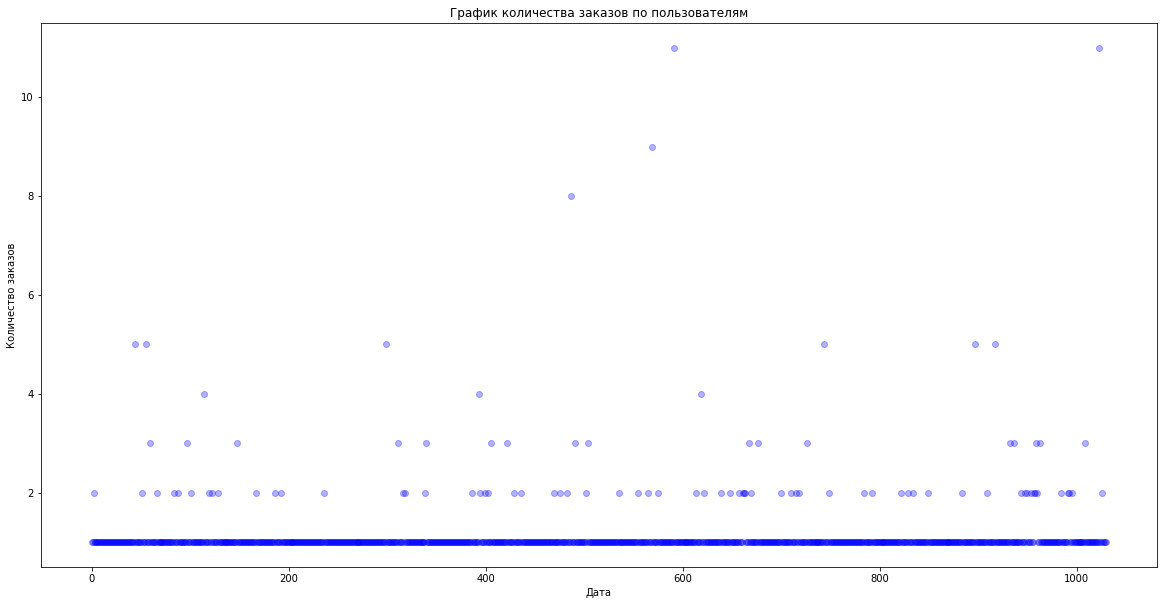

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(20,10))
plt.title('График количества заказов по пользователям')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.3,color = 'Blue') ;

Из графика видно, что наибольшее количество пользователей, которые совершили один заказ. Два заказа совершили значительно меньшее количество пользователей, а более двух заказов совершило минимальное количество пользователей.

# 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.


In [32]:
#Рассчитаем 95 и 99 перцентили
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

In [33]:
#Рассчитаем c 95-uj и 99-й перцентиль
np.percentile(ordersByUsers['orders'], [95,96,97,98, 99])

array([2., 2., 2., 3., 4.])

Из расчетов видим, большая часть пользователей делает один или два заказа, а если пользователь делает больше заказов, то это можно считать аномалией.

# Стоимость заказов

Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

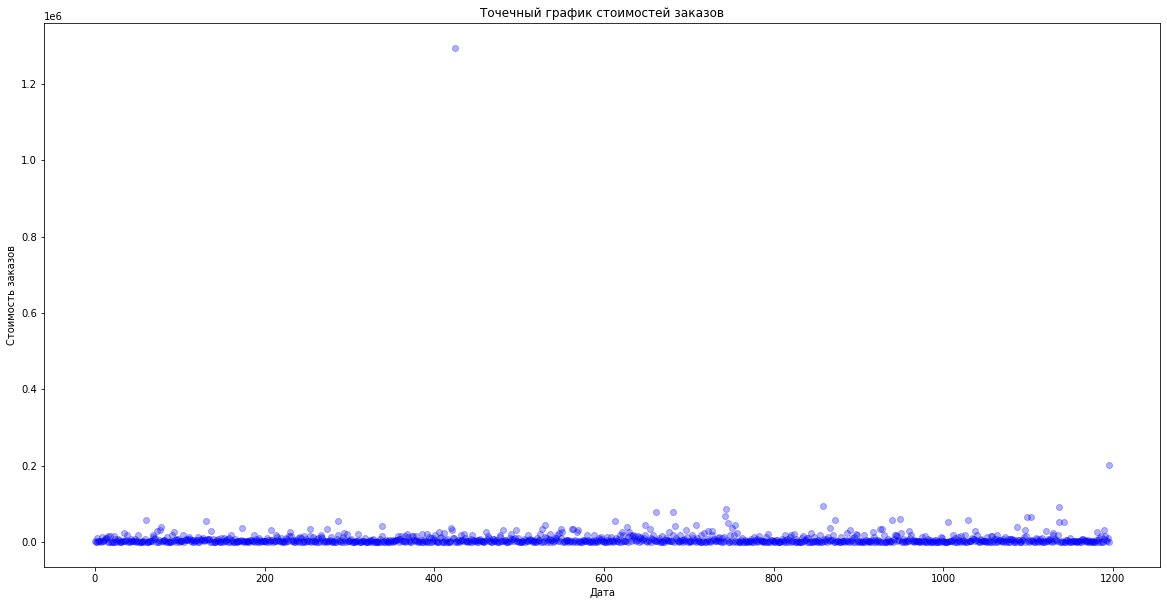

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20,10))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Дата')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.3,color = 'Blue');

На графике видно, что присутствуют "выбросы" (высокая стоимость заказов) из-за которых на графике нельзя более подробно увидеть стоимость заказов, поэтому уберем эти аномалии для того, чтобы построить более подходящий график.

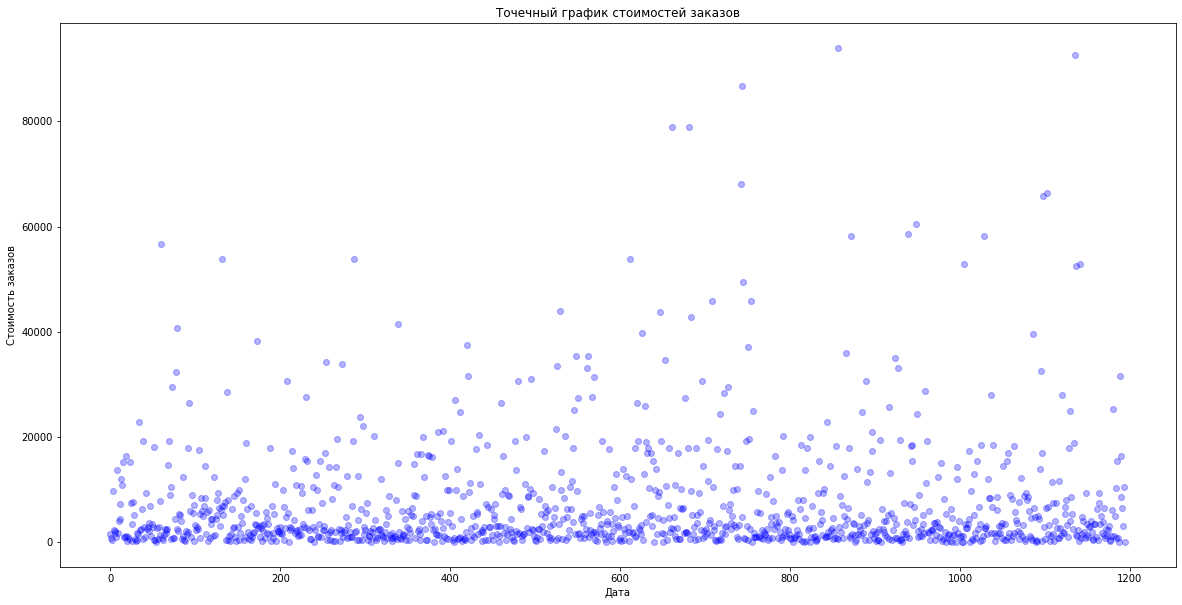

In [35]:
without_anom_orders = orders[orders['revenue']<=190000]['revenue']
xn_values = pd.Series(range(0,len(without_anom_orders)))
plt.figure(figsize=(20,10))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Дата')
plt.ylabel('Стоимость заказов')
plt.scatter(xn_values, without_anom_orders , alpha=0.3,color='Blue');

Видим, что большая часть заказов в диапазоне от 0 до 100 000 тысяч у.е.

# 95-й и 99-й перцентили стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Видим, что сумма 99% заказов меньше 58233.2 . Можно сделать вывод, что сумма заказа более данной суммы можно назвать аномальной.

# Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения.

In [37]:
#Необходимо собрать данные по заказам и визитам в одну таблицу
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [38]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

Перед проверкой сформулируем гипотезы:

Нулевая гипотеза: статистически значимых различий в среднем количестве заказов между группами по «сырым» данным между группами нет;

Альтернативная гипотеза:  статистически значимые различия в среднем количестве заказов между группами по «сырым» данным между группами  есть;

Значение alpha примем = 0.05;

Статистический критерий : p-критерий 

In [39]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.2f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель B и A = {0:.2f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.02
Относительный показатель B и A = 0.14


Из расчетов видим, что p-value = 0.02 < 0.05, то есть можем отвергнуть нулевую гипотезу. Значит, что различия в конверсии групп A и B есть. Относительный показать В к А = 0.14.

# Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Для определения статистической значимости различий в среднем чеке между группами А и В дадим критерию mannwhitneyu() данные о выручке с заказов и вычислим относительные различия в среднем чеке между группами.

Примем нулевую гипотезу: значимых различий в средних чеках заказа между группами по сырым данным нет.
Альтернативная гипотеза: значимое различие в средних чеках заказа между группами по сырым данным есть



In [40]:
print("alpha =",0.05)
print("p-value = {0:.2f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель B и A = {0:.2f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.73
Относительный показатель B и A = 0.26


Из расчетов видим, что p-value = 0.73 > 0.05, то есть мы принимаем нулевую гипотезу. Значит, что значимого различия в средних чеках заказа между группами по сырым данным нет. Относительный показать В к А = 0.26, что свидетельствует о том, средний чек группы В больше среднего чека группа А на 26%. 

Но стоит отметить, что различий в среднем чеке заказа между группами А и В нет, а наблюдаемое превышение среднего чека группы В на 25,9% не является значимым, получено случайно.

# Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения.


Для того, чтобы объединить таблицы необходимо для начала сделать срезы пользвателей совершивих нормальное количество заказов(1, 2) и ненормальное количество заказов (более 2).

In [41]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(10)) 

1099    148427295 
18      199603092 
23      237748145 
37      249864742 
68      457167155 
68      611059232 
949     887908475 
744     888512513 
1103    1164614297
146     1230306981
dtype: int64


In [42]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 


Применим статистический критерий Манна-Уитни.

Нулевая гипотеза: Значимых различий в среднем количестве заказов между группами по «очищенным» данным между группами нет

Альтернативная гипотеза: значимое различие в среднем количестве заказов между группами по «очищенным» данным есть

In [43]:
print("alpha =",0.05)
print("p-value = {0:.2f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель B и A = {0:.2f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.01
Относительный показатель B и A = 0.17


Из расчетов видим, что p-value = 0.01 < 0.05, то есть мы можем отвергнуть нулевую гипотезу. Относительный показать В к А = 0.17, что свидетельствует о том, средний чек группы В больше среднего чека группа А на 17%.

# Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Нулевая гипотеза: Значимых различий в среднем чеке заказа между группами по «очищенным» данным между группами нет 

Альтернативная гипотеза: значимое различие в среднем чеке заказа между группами по «очищенным» данным есть

In [44]:
print("alpha =",0.05)
print("p-value = {0:.2f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель B и A = {0:.2f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.80
Относительный показатель B и A = -0.02


Из расчетов видим, что p-value = 0.80 > 0.05, то есть мы принимаем нулевую гипотезу. Значит, что значимого различия  в средних чеках заказа между группами по сырым данным нет.

Относительный показать В к А = - 0.02, что свидетельствует о том, средний чек группы А выше средний чек выше на 2%.

# Примем решение по результатам теста

Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Различия между группами А и В есть как по по "сырым" так и по "очищенным" данным.

Видно, что эффективность группы В больше группы А по очищенным данным почти на 17% и на 14% по сырым данным. 

В процессе тестирования пришли к решению остановить тест и зафиксировать победу одну из групп - группы В. 


# Вывод

В первой части провели исследовательский анализ данных: 

- ознакомились с датафреймами: вывели общую информацию и проверили на дубликаты, поменяли тип данных, где это было необходимо.
    
Также выполнили следующие задачи: 
    
1.Применили фреймворк ICE для приоритизации гипотез.

2.Отсортировали их по убыванию приоритета.

3.Применили фреймворк RICE для приоритизации гипотез.

4.Отсортировали их по убыванию приоритета.

5.Указали как изменилась приоритизация гипотез при применении RICE вместо ICE:

В таблицах ICE и RICE разные лидеры. Так произошло, потому что при расчете RICE мы учитываем один из компонентов данной модификации(подробнее описаны выше), а конкретно - параметр Reach, который показывает, скольких пользователей затронет изменение, которое мы хотим внести.

Для тестирования будем выбирать гипотезы из таблицы с расчетом RICE: 
- гипотеза № 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

- гипотеза № 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 

В случае, если придется выбрать еще одну гипотезу - дополнительно выберем:

- гипотезу № 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Во второй части:

Проанализировали A/B-тест:

Различия между группами А и В есть как по по "сырым" так и по "очищенным" данным.

В процессе тестирования пришли к решению остановить тест и зафиксировать победу одну из групп - группы В, т.к результат тестирований данной гипотезы показал ее высокую эффективность относительно группы А. Эффективность группы В больше группы А по очищенным данным почти на 17% и на 14% по сырым данным. 